In [2]:
%pip install --upgrade pip
%pip install polars
%pip install pandas

from time import time
import pandas as pd
import polars as pl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### Функция для отрисовки

In [3]:
import matplotlib.pyplot as plt
def plot_time_bar(time_pl: float, time_pd: float):

    print(f'Pandas: {time_pd}; Polars: {time_pl}')
    fig, ax = plt.subplots()

    x_axis = ['Pandas', 'Polars']
    counts = [time_pd, time_pl]
    bar_labels = ['Pandas', 'Polars']
    bar_colors = ['tab:red', 'tab:green']

    ax.bar(x_axis, counts, label=bar_labels, color=bar_colors)

    ax.set_ylabel('Time')
    ax.set_title('Pandas vs Polars time comparison')
    ax.legend(title='Libraries')

    plt.show()


### Movielens-20m dataset

Link: https://grouplens.org/datasets/movielens/20m/

#### Скачивание датасета

In [4]:
# ! wget https://files.grouplens.org/datasets/movielens/ml-20m.zip
# ! apt-get install unzip && unzip ml-20m.zip
# ! wget https://files.grouplens.org/datasets/movielens/ml-20m.zip.md5
! md5sum ml-20m.zip; cat ml-20m.zip.md5

cd245b17a1ae2cc31bb14903e1204af3  ml-20m.zip
MD5 (ml-20m.zip) = cd245b17a1ae2cc31bb14903e1204af3


#### Описание данных

 - `ratings.csv` - информация об интеракциях пользователя (проставленные рейтинги для фильмов)  
    `[userId, movieId, rating, timestamp]`
 - `movies.csv` - метаинформация о фильмах (название, жанры)  
    `[movieId, title, genres]`
 - `tags.csv` - тэги пользователей о фильмах  
    `[userId, movieId, tag]`

### Чтение данных

Pandas: 5.108203887939453; Polars: 0.32105255126953125


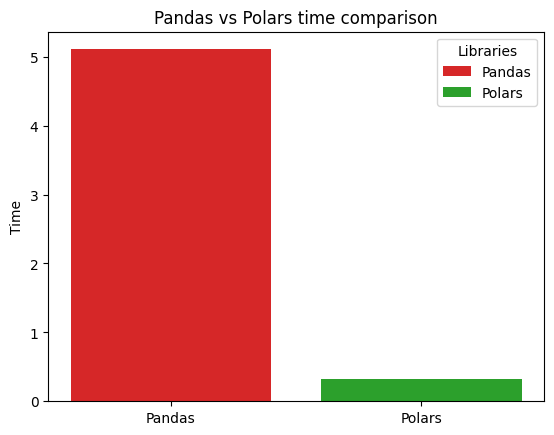

In [5]:
start = time()
interactions_pd = pd.read_csv(
    'ml-20m/ratings.csv', 
    delimiter=',',
    header = 0
)

item_features_pd = pd.read_csv(
    'ml-20m/movies.csv', 
    delimiter=',',
    header = 0
)

tags_pd = pd.read_csv(
    'ml-20m/tags.csv', 
    delimiter=',',
    header = 0
)

time_pd = time() - start

# Read data using polars
start = time()
interactions_pl = pl.read_csv(
    'ml-20m/ratings.csv', 
    separator=',', 
    has_header=True, 
)

item_features_pl = pl.read_csv(
    'ml-20m/movies.csv', 
    separator=',',
    has_header=True
)

tags_pl = pl.read_csv(
    'ml-20m/tags.csv', 
    separator=',',
    has_header=True
)

time_pl = time() - start
plot_time_bar(time_pl, time_pd)

#### Описание данных

In [6]:
print(interactions_pl)
print(interactions_pd)
print(interactions_pd.dtypes)

shape: (20_000_263, 4)
┌────────┬─────────┬────────┬────────────┐
│ userId ┆ movieId ┆ rating ┆ timestamp  │
│ ---    ┆ ---     ┆ ---    ┆ ---        │
│ i64    ┆ i64     ┆ f64    ┆ i64        │
╞════════╪═════════╪════════╪════════════╡
│ 1      ┆ 2       ┆ 3.5    ┆ 1112486027 │
│ 1      ┆ 29      ┆ 3.5    ┆ 1112484676 │
│ 1      ┆ 32      ┆ 3.5    ┆ 1112484819 │
│ 1      ┆ 47      ┆ 3.5    ┆ 1112484727 │
│ …      ┆ …       ┆ …      ┆ …          │
│ 138493 ┆ 69526   ┆ 4.5    ┆ 1259865108 │
│ 138493 ┆ 69644   ┆ 3.0    ┆ 1260209457 │
│ 138493 ┆ 70286   ┆ 5.0    ┆ 1258126944 │
│ 138493 ┆ 71619   ┆ 2.5    ┆ 1255811136 │
└────────┴─────────┴────────┴────────────┘
          userId  movieId  rating   timestamp
0              1        2     3.5  1112486027
1              1       29     3.5  1112484676
2              1       32     3.5  1112484819
3              1       47     3.5  1112484727
4              1       50     3.5  1112484580
...          ...      ...     ...         ...
20000258  

In [7]:
print(interactions_pl)
print(item_features_pl)
print(tags_pl)

shape: (20_000_263, 4)
┌────────┬─────────┬────────┬────────────┐
│ userId ┆ movieId ┆ rating ┆ timestamp  │
│ ---    ┆ ---     ┆ ---    ┆ ---        │
│ i64    ┆ i64     ┆ f64    ┆ i64        │
╞════════╪═════════╪════════╪════════════╡
│ 1      ┆ 2       ┆ 3.5    ┆ 1112486027 │
│ 1      ┆ 29      ┆ 3.5    ┆ 1112484676 │
│ 1      ┆ 32      ┆ 3.5    ┆ 1112484819 │
│ 1      ┆ 47      ┆ 3.5    ┆ 1112484727 │
│ …      ┆ …       ┆ …      ┆ …          │
│ 138493 ┆ 69526   ┆ 4.5    ┆ 1259865108 │
│ 138493 ┆ 69644   ┆ 3.0    ┆ 1260209457 │
│ 138493 ┆ 70286   ┆ 5.0    ┆ 1258126944 │
│ 138493 ┆ 71619   ┆ 2.5    ┆ 1255811136 │
└────────┴─────────┴────────┴────────────┘
shape: (27_278, 3)
┌─────────┬───────────────────────────────┬───────────────────────────────────┐
│ movieId ┆ title                         ┆ genres                            │
│ ---     ┆ ---                           ┆ ---                               │
│ i64     ┆ str                           ┆ str                          

In [10]:
print('interactions_pl')
print(interactions_pl.describe())
print('item_features_pl')
print(item_features_pl.describe())
print('tags_pl')
print(tags_pl.describe())

# print('interactions_pd')
# print(interactions_pd.describe())
# print('item_features_pd')
# print(item_features_pd.describe())
# print('tags_pd')
# print(tags_pd.describe())

interactions_pl
shape: (9, 5)
┌────────────┬──────────────┬──────────────┬─────────────┬──────────────┐
│ describe   ┆ userId       ┆ movieId      ┆ rating      ┆ timestamp    │
│ ---        ┆ ---          ┆ ---          ┆ ---         ┆ ---          │
│ str        ┆ f64          ┆ f64          ┆ f64         ┆ f64          │
╞════════════╪══════════════╪══════════════╪═════════════╪══════════════╡
│ count      ┆ 2.0000263e7  ┆ 2.0000263e7  ┆ 2.0000263e7 ┆ 2.0000263e7  │
│ null_count ┆ 0.0          ┆ 0.0          ┆ 0.0         ┆ 0.0          │
│ mean       ┆ 69045.872583 ┆ 9041.56733   ┆ 3.525529    ┆ 1.1009e9     │
│ std        ┆ 40038.626653 ┆ 19789.477445 ┆ 1.051989    ┆ 1.6217e8     │
│ min        ┆ 1.0          ┆ 1.0          ┆ 0.5         ┆ 7.89652004e8 │
│ 25%        ┆ 34395.0      ┆ 902.0        ┆ 3.0         ┆ 9.66797706e8 │
│ 50%        ┆ 69141.0      ┆ 2167.0       ┆ 3.5         ┆ 1.1036e9     │
│ 75%        ┆ 103637.0     ┆ 4770.0       ┆ 4.0         ┆ 1.2256e9     │
│ max   

### Простые операции

#### Переименование колонок

Pandas: 0.19500994682312012; Polars: 0.0006330013275146484


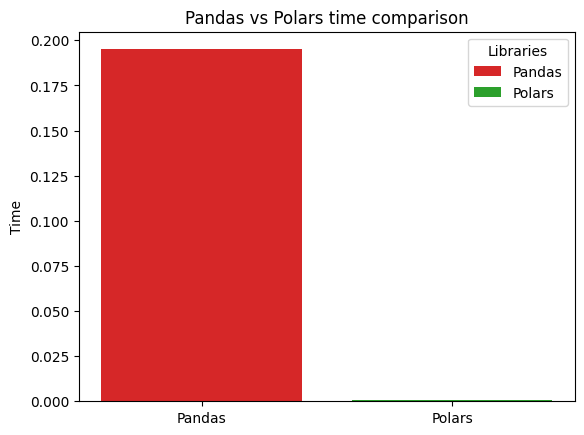

In [11]:
# переименование колонок 
interations_mapping = {
    'movieId' : 'item_id',
    'userId' : 'user_id',
}
item_features_mapping = {
    'movieId' : 'item_id',
}

start = time()
interactions_pl = interactions_pl.rename(interations_mapping)
item_features_pl = item_features_pl.rename(item_features_mapping)
tags_pl = tags_pl.rename(interations_mapping)
time_pl = time() - start

start = time()
interactions_pd = interactions_pd.rename(columns=interations_mapping)
item_features_pd = item_features_pd.rename(columns=item_features_mapping)
tags_pd = tags_pd.rename(columns=interations_mapping)
time_pd = time() - start

time_pd = time() - start
plot_time_bar(time_pl, time_pd)



In [12]:
print(interactions_pl)
print(interactions_pd)

shape: (20_000_263, 4)
┌─────────┬─────────┬────────┬────────────┐
│ user_id ┆ item_id ┆ rating ┆ timestamp  │
│ ---     ┆ ---     ┆ ---    ┆ ---        │
│ i64     ┆ i64     ┆ f64    ┆ i64        │
╞═════════╪═════════╪════════╪════════════╡
│ 1       ┆ 2       ┆ 3.5    ┆ 1112486027 │
│ 1       ┆ 29      ┆ 3.5    ┆ 1112484676 │
│ 1       ┆ 32      ┆ 3.5    ┆ 1112484819 │
│ 1       ┆ 47      ┆ 3.5    ┆ 1112484727 │
│ …       ┆ …       ┆ …      ┆ …          │
│ 138493  ┆ 69526   ┆ 4.5    ┆ 1259865108 │
│ 138493  ┆ 69644   ┆ 3.0    ┆ 1260209457 │
│ 138493  ┆ 70286   ┆ 5.0    ┆ 1258126944 │
│ 138493  ┆ 71619   ┆ 2.5    ┆ 1255811136 │
└─────────┴─────────┴────────┴────────────┘
          user_id  item_id  rating   timestamp
0               1        2     3.5  1112486027
1               1       29     3.5  1112484676
2               1       32     3.5  1112484819
3               1       47     3.5  1112484727
4               1       50     3.5  1112484580
...           ...      ...     ... 

#### Арифметические операции

Pandas: 0.0885779857635498; Polars: 0.0653223991394043


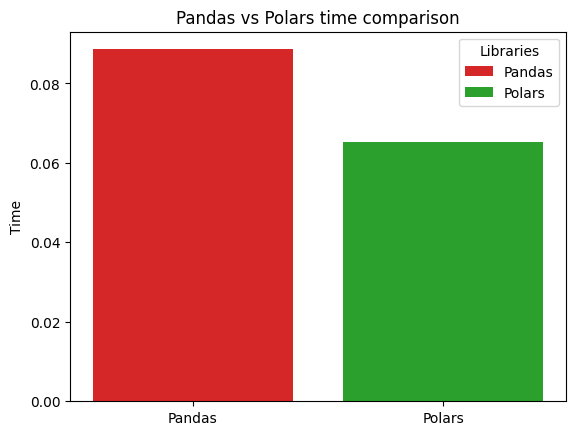

In [13]:
# нормировка рейтинга
start = time()
interactions_pl = interactions_pl.with_columns(
    (pl.col('rating')/5.).alias('rating_normalized')
)
time_pl = time() - start

start = time()
interactions_pd["rating_normalized"] = interactions_pd['rating']/5.
time_pd = time() - start

plot_time_bar(time_pl, time_pd)


In [14]:
print(interactions_pl)
print(interactions_pd)

shape: (20_000_263, 5)
┌─────────┬─────────┬────────┬────────────┬───────────────────┐
│ user_id ┆ item_id ┆ rating ┆ timestamp  ┆ rating_normalized │
│ ---     ┆ ---     ┆ ---    ┆ ---        ┆ ---               │
│ i64     ┆ i64     ┆ f64    ┆ i64        ┆ f64               │
╞═════════╪═════════╪════════╪════════════╪═══════════════════╡
│ 1       ┆ 2       ┆ 3.5    ┆ 1112486027 ┆ 0.7               │
│ 1       ┆ 29      ┆ 3.5    ┆ 1112484676 ┆ 0.7               │
│ 1       ┆ 32      ┆ 3.5    ┆ 1112484819 ┆ 0.7               │
│ 1       ┆ 47      ┆ 3.5    ┆ 1112484727 ┆ 0.7               │
│ …       ┆ …       ┆ …      ┆ …          ┆ …                 │
│ 138493  ┆ 69526   ┆ 4.5    ┆ 1259865108 ┆ 0.9               │
│ 138493  ┆ 69644   ┆ 3.0    ┆ 1260209457 ┆ 0.6               │
│ 138493  ┆ 70286   ┆ 5.0    ┆ 1258126944 ┆ 1.0               │
│ 138493  ┆ 71619   ┆ 2.5    ┆ 1255811136 ┆ 0.5               │
└─────────┴─────────┴────────┴────────────┴───────────────────┘
          user_id

#### Преобразование типов

Pandas: 0.30188822746276855; Polars: 0.1640918254852295


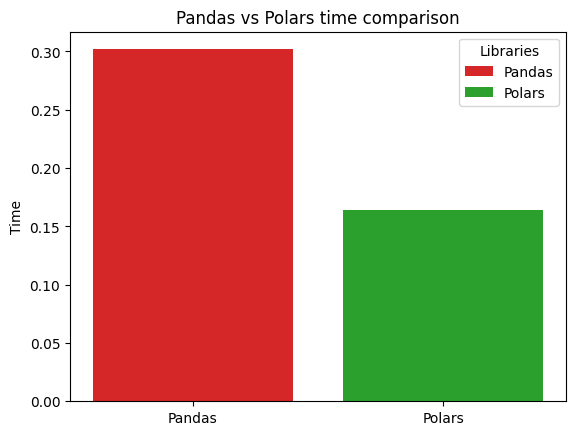

In [15]:
start = time()
interactions_pl = interactions_pl.with_columns(
    pl.col('user_id').cast(pl.Int32),
    pl.col('item_id').cast(pl.Int32),
    pl.col('rating').cast(pl.Float32),
)
item_features_pl = item_features_pl.with_columns(
    pl.col('item_id').cast(pl.Int32)
)
tags_pl = tags_pl.with_columns(
    pl.col('user_id').cast(pl.Int32),
    pl.col('item_id').cast(pl.Int32),
)

time_pl = time() - start

start = time()
interactions_pd['user_id'] = interactions_pd['user_id'].astype('int32')
interactions_pd['item_id'] = interactions_pd['item_id'].astype('int32')
interactions_pd['rating'] = interactions_pd['rating'].astype('float32')

item_features_pd['item_id'] = item_features_pd['item_id'].astype('int32')

tags_pd['user_id'] = tags_pd['user_id'].astype('int32')
tags_pd['item_id'] = tags_pd['item_id'].astype('int32')

time_pd = time() - start

plot_time_bar(time_pl, time_pd)

In [16]:
print('Polars dtypes:', interactions_pl.dtypes)
print('Pandas dtypes:\n', interactions_pd.dtypes)


Polars dtypes: [Int32, Int32, Float32, Int64, Float64]
Pandas dtypes:
 user_id                int32
item_id                int32
rating               float32
timestamp              int64
rating_normalized    float64
dtype: object


In [17]:
print(interactions_pl)

shape: (20_000_263, 5)
┌─────────┬─────────┬────────┬────────────┬───────────────────┐
│ user_id ┆ item_id ┆ rating ┆ timestamp  ┆ rating_normalized │
│ ---     ┆ ---     ┆ ---    ┆ ---        ┆ ---               │
│ i32     ┆ i32     ┆ f32    ┆ i64        ┆ f64               │
╞═════════╪═════════╪════════╪════════════╪═══════════════════╡
│ 1       ┆ 2       ┆ 3.5    ┆ 1112486027 ┆ 0.7               │
│ 1       ┆ 29      ┆ 3.5    ┆ 1112484676 ┆ 0.7               │
│ 1       ┆ 32      ┆ 3.5    ┆ 1112484819 ┆ 0.7               │
│ 1       ┆ 47      ┆ 3.5    ┆ 1112484727 ┆ 0.7               │
│ …       ┆ …       ┆ …      ┆ …          ┆ …                 │
│ 138493  ┆ 69526   ┆ 4.5    ┆ 1259865108 ┆ 0.9               │
│ 138493  ┆ 69644   ┆ 3.0    ┆ 1260209457 ┆ 0.6               │
│ 138493  ┆ 70286   ┆ 5.0    ┆ 1258126944 ┆ 1.0               │
│ 138493  ┆ 71619   ┆ 2.5    ┆ 1255811136 ┆ 0.5               │
└─────────┴─────────┴────────┴────────────┴───────────────────┘


#### Агрегация

Pandas: 0.18973374366760254; Polars: 0.16078805923461914


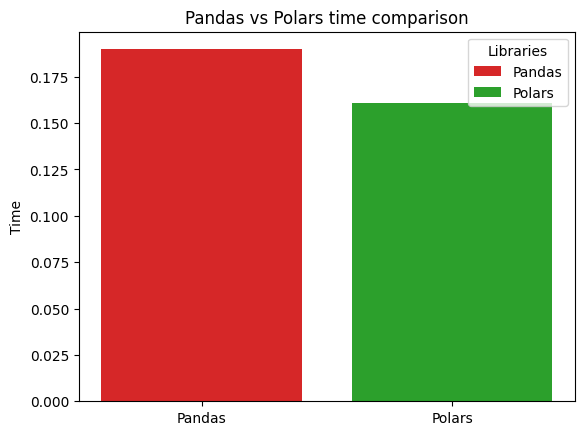

In [18]:
start = time()
interactions_pl.select(pl.col('rating')).std()
interactions_pl.select(pl.col('rating')).mean()
interactions_pl.select(pl.col('rating')).max()
interactions_pl.select(pl.col('rating')).min()
time_pl = time() - start

start = time()
interactions_pd['rating'].std()
interactions_pd['rating'].mean()
interactions_pd['rating'].max()
interactions_pd['rating'].min()
time_pd = time() - start

plot_time_bar(time_pl, time_pd)


#### Выбор и модификация 

##### top k

shape: (100, 5)
┌─────────┬─────────┬────────┬────────────┬───────────────────┐
│ user_id ┆ item_id ┆ rating ┆ timestamp  ┆ rating_normalized │
│ ---     ┆ ---     ┆ ---    ┆ ---        ┆ ---               │
│ i32     ┆ i32     ┆ f32    ┆ i64        ┆ f64               │
╞═════════╪═════════╪════════╪════════════╪═══════════════════╡
│ 87586   ┆ 7151    ┆ 3.5    ┆ 1427784002 ┆ 0.7               │
│ 89081   ┆ 52458   ┆ 4.0    ┆ 1427782288 ┆ 0.8               │
│ 89081   ┆ 55232   ┆ 3.5    ┆ 1427782286 ┆ 0.7               │
│ 16978   ┆ 2093    ┆ 3.5    ┆ 1427781797 ┆ 0.7               │
│ …       ┆ …       ┆ …      ┆ …          ┆ …                 │
│ 41267   ┆ 85992   ┆ 2.0    ┆ 1427773451 ┆ 0.4               │
│ 41267   ┆ 115664  ┆ 3.0    ┆ 1427773211 ┆ 0.6               │
│ 79366   ┆ 45183   ┆ 3.5    ┆ 1427773181 ┆ 0.7               │
│ 41267   ┆ 25840   ┆ 2.5    ┆ 1427772807 ┆ 0.5               │
└─────────┴─────────┴────────┴────────────┴───────────────────┘
          user_id  item_

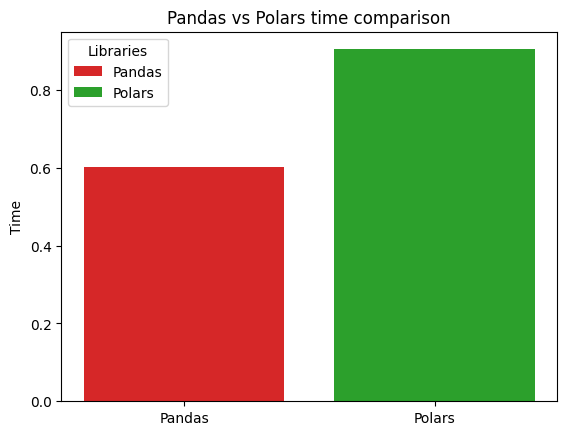

In [20]:
# выбираем 100 последних событий

start = time()
print(interactions_pl.top_k(100, by='timestamp'))
time_pl = time() - start

start = time()
print(interactions_pd.nlargest(100, 'timestamp'))
time_pd = time() - start

plot_time_bar(time_pl, time_pd)

##### sort

Pandas: 2.7024083137512207; Polars: 0.5922155380249023


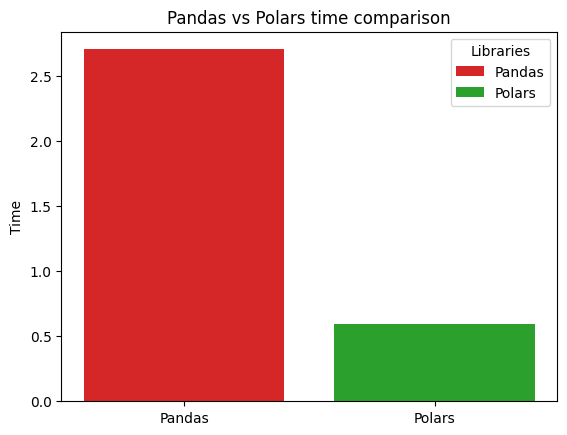

In [22]:
start = time()
interactions_pl.sort(pl.col('timestamp'))
time_pl = time() - start

start = time()
interactions_pd.sort_values('timestamp')
time_pd = time() - start

plot_time_bar(time_pl, time_pd)

#### Операция со строками

In [23]:
item_features_pl

item_id,title,genres
i32,str,str
1,"""Toy Story (199…","""Adventure|Anim…"
2,"""Jumanji (1995)…","""Adventure|Chil…"
3,"""Grumpier Old M…","""Comedy|Romance…"
4,"""Waiting to Exh…","""Comedy|Drama|R…"
5,"""Father of the …","""Comedy"""
6,"""Heat (1995)""","""Action|Crime|T…"
7,"""Sabrina (1995)…","""Comedy|Romance…"
8,"""Tom and Huck (…","""Adventure|Chil…"
9,"""Sudden Death (…","""Action"""


Pandas: 0.10779380798339844; Polars: 0.005751371383666992


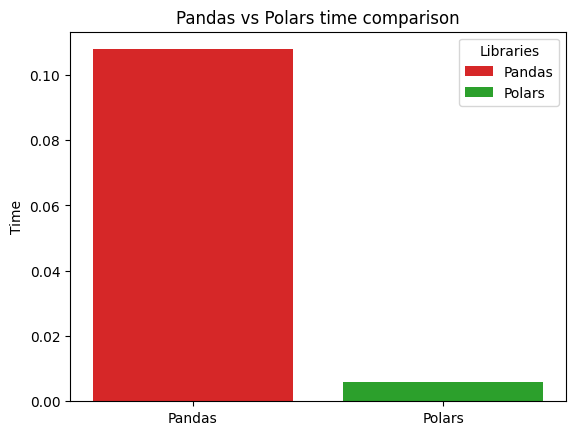

In [24]:
start = time()

item_features_pl = item_features_pl.with_columns(
    pl.col("genres").str.to_lowercase().str.split('|'),
)
time_pl = time() - start

start = time()
item_features_pd["genres"] = item_features_pd["genres"].str.lower().str.split('|')
time_pd = time() - start

plot_time_bar(time_pl, time_pd)


In [28]:
item_features_pl

item_id,title,genres
i32,str,list[str]
1,"""Toy Story (199…","[""adventure"", ""animation"", … ""fantasy""]"
2,"""Jumanji (1995)…","[""adventure"", ""children"", ""fantasy""]"
3,"""Grumpier Old M…","[""comedy"", ""romance""]"
4,"""Waiting to Exh…","[""comedy"", ""drama"", ""romance""]"
5,"""Father of the …","[""comedy""]"
6,"""Heat (1995)""","[""action"", ""crime"", ""thriller""]"
7,"""Sabrina (1995)…","[""comedy"", ""romance""]"
8,"""Tom and Huck (…","[""adventure"", ""children""]"
9,"""Sudden Death (…","[""action""]"


#### Операции со списками

In [29]:
# Добавление количества жанров для каждого фильма
item_features_pl.with_columns(pl.col("genres").list.lengths().alias('count_genres'))

item_id,title,genres,count_genres
i32,str,list[str],u32
1,"""Toy Story (199…","[""adventure"", ""animation"", … ""fantasy""]",5
2,"""Jumanji (1995)…","[""adventure"", ""children"", ""fantasy""]",3
3,"""Grumpier Old M…","[""comedy"", ""romance""]",2
4,"""Waiting to Exh…","[""comedy"", ""drama"", ""romance""]",3
5,"""Father of the …","[""comedy""]",1
6,"""Heat (1995)""","[""action"", ""crime"", ""thriller""]",3
7,"""Sabrina (1995)…","[""comedy"", ""romance""]",2
8,"""Tom and Huck (…","[""adventure"", ""children""]",2
9,"""Sudden Death (…","[""action""]",1


In [30]:
# Добавление маски - доступно для детей
item_features_pl.with_columns(pl.col('genres').list.contains('children').alias('for_child'))

item_id,title,genres,for_child
i32,str,list[str],bool
1,"""Toy Story (199…","[""adventure"", ""animation"", … ""fantasy""]",true
2,"""Jumanji (1995)…","[""adventure"", ""children"", ""fantasy""]",true
3,"""Grumpier Old M…","[""comedy"", ""romance""]",false
4,"""Waiting to Exh…","[""comedy"", ""drama"", ""romance""]",false
5,"""Father of the …","[""comedy""]",false
6,"""Heat (1995)""","[""action"", ""crime"", ""thriller""]",false
7,"""Sabrina (1995)…","[""comedy"", ""romance""]",false
8,"""Tom and Huck (…","[""adventure"", ""children""]",true
9,"""Sudden Death (…","[""action""]",false


#### Работа с датами

In [31]:
interactions_pl

user_id,item_id,rating,timestamp,rating_normalized
i32,i32,f32,i64,f64
1,2,3.5,1112486027,0.7
1,29,3.5,1112484676,0.7
1,32,3.5,1112484819,0.7
1,47,3.5,1112484727,0.7
1,50,3.5,1112484580,0.7
1,112,3.5,1094785740,0.7
1,151,4.0,1094785734,0.8
1,223,4.0,1112485573,0.8
1,253,4.0,1112484940,0.8


Pandas: 6.4322350025177; Polars: 0.0690617561340332


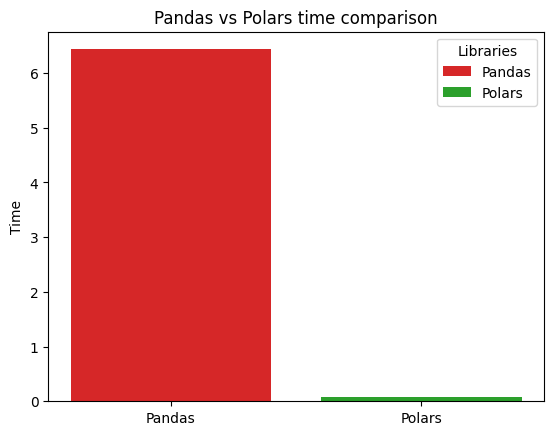

In [32]:
start = time()
interactions_pl = interactions_pl.with_columns(pl.from_epoch("timestamp", time_unit="s").alias('datetime'))
time_pl = time() - start

start = time()
interactions_pd["datetime"] = pd.to_datetime(interactions_pd['timestamp'], unit='s')
time_pd = time() - start

plot_time_bar(time_pl, time_pd)

In [33]:
print(interactions_pl)
print(interactions_pd)

shape: (20_000_263, 6)
┌─────────┬─────────┬────────┬────────────┬───────────────────┬─────────────────────┐
│ user_id ┆ item_id ┆ rating ┆ timestamp  ┆ rating_normalized ┆ datetime            │
│ ---     ┆ ---     ┆ ---    ┆ ---        ┆ ---               ┆ ---                 │
│ i32     ┆ i32     ┆ f32    ┆ i64        ┆ f64               ┆ datetime[μs]        │
╞═════════╪═════════╪════════╪════════════╪═══════════════════╪═════════════════════╡
│ 1       ┆ 2       ┆ 3.5    ┆ 1112486027 ┆ 0.7               ┆ 2005-04-02 23:53:47 │
│ 1       ┆ 29      ┆ 3.5    ┆ 1112484676 ┆ 0.7               ┆ 2005-04-02 23:31:16 │
│ 1       ┆ 32      ┆ 3.5    ┆ 1112484819 ┆ 0.7               ┆ 2005-04-02 23:33:39 │
│ 1       ┆ 47      ┆ 3.5    ┆ 1112484727 ┆ 0.7               ┆ 2005-04-02 23:32:07 │
│ …       ┆ …       ┆ …      ┆ …          ┆ …                 ┆ …                   │
│ 138493  ┆ 69526   ┆ 4.5    ┆ 1259865108 ┆ 0.9               ┆ 2009-12-03 18:31:48 │
│ 138493  ┆ 69644   ┆ 3.0    ┆ 

##### Добавление дня недели

Pandas: 0.8358595371246338; Polars: 0.2704300880432129


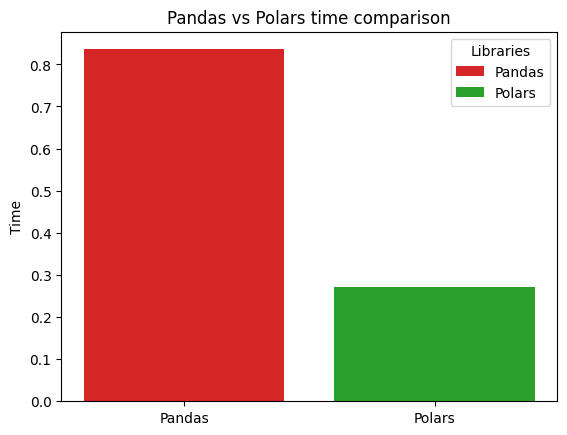

In [34]:
start = time()
interactions_pl = interactions_pl.with_columns(pl.col('datetime').dt.weekday().alias('weekday'))

time_pl = time() - start

start = time()
interactions_pd['weekday'] = interactions_pd['datetime'].dt.weekday
time_pd = time() - start

plot_time_bar(time_pl, time_pd)

In [35]:
print(interactions_pl)
print(interactions_pd)

shape: (20_000_263, 7)
┌─────────┬─────────┬────────┬────────────┬───────────────────┬─────────────────────┬─────────┐
│ user_id ┆ item_id ┆ rating ┆ timestamp  ┆ rating_normalized ┆ datetime            ┆ weekday │
│ ---     ┆ ---     ┆ ---    ┆ ---        ┆ ---               ┆ ---                 ┆ ---     │
│ i32     ┆ i32     ┆ f32    ┆ i64        ┆ f64               ┆ datetime[μs]        ┆ u32     │
╞═════════╪═════════╪════════╪════════════╪═══════════════════╪═════════════════════╪═════════╡
│ 1       ┆ 2       ┆ 3.5    ┆ 1112486027 ┆ 0.7               ┆ 2005-04-02 23:53:47 ┆ 6       │
│ 1       ┆ 29      ┆ 3.5    ┆ 1112484676 ┆ 0.7               ┆ 2005-04-02 23:31:16 ┆ 6       │
│ 1       ┆ 32      ┆ 3.5    ┆ 1112484819 ┆ 0.7               ┆ 2005-04-02 23:33:39 ┆ 6       │
│ 1       ┆ 47      ┆ 3.5    ┆ 1112484727 ┆ 0.7               ┆ 2005-04-02 23:32:07 ┆ 6       │
│ …       ┆ …       ┆ …      ┆ …          ┆ …                 ┆ …                   ┆ …       │
│ 138493  ┆ 69526

#### Фильтрация

Pandas: 0.4970204830169678; Polars: 0.22370433807373047


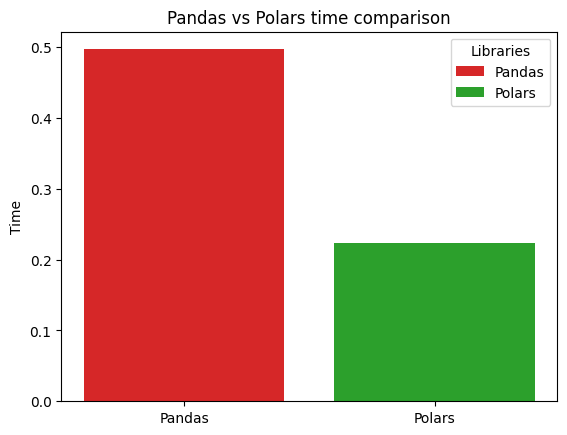

In [36]:
# лучшие фильмы выходного дня
start = time()
interactions_pl.filter((pl.col('rating') >= 4) & (pl.col('weekday') >= 6))
time_pl = time() - start

start = time()
interactions_pd.query('rating >= 4 & weekday >= 6')
time_pd = time() - start

plot_time_bar(time_pl, time_pd)

#### Join

In [37]:
item_features_pl

item_id,title,genres
i32,str,list[str]
1,"""Toy Story (199…","[""adventure"", ""animation"", … ""fantasy""]"
2,"""Jumanji (1995)…","[""adventure"", ""children"", ""fantasy""]"
3,"""Grumpier Old M…","[""comedy"", ""romance""]"
4,"""Waiting to Exh…","[""comedy"", ""drama"", ""romance""]"
5,"""Father of the …","[""comedy""]"
6,"""Heat (1995)""","[""action"", ""crime"", ""thriller""]"
7,"""Sabrina (1995)…","[""comedy"", ""romance""]"
8,"""Tom and Huck (…","[""adventure"", ""children""]"
9,"""Sudden Death (…","[""action""]"


Pandas: 2.7718045711517334; Polars: 1.7993168830871582


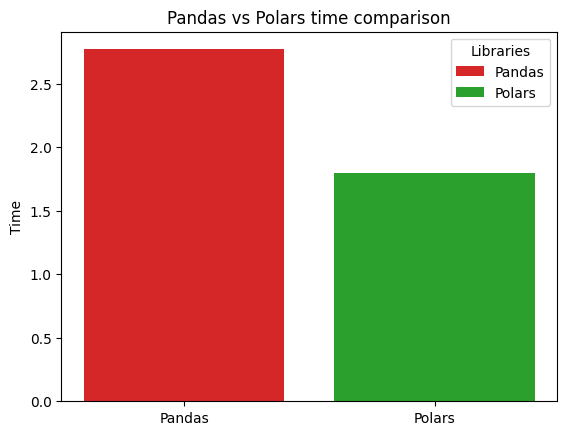

In [38]:
start = time()
interaction_with_item_info_pl = interactions_pl.join(item_features_pl, on='item_id', how='inner')
time_pl = time() - start

start = time()
interaction_with_item_info_pd = interactions_pd.merge(item_features_pd, on='item_id', how='inner')
time_pd = time() - start

plot_time_bar(time_pl, time_pd)

In [39]:
interaction_with_item_info_pl

user_id,item_id,rating,timestamp,rating_normalized,datetime,weekday,title,genres
i32,i32,f32,i64,f64,datetime[μs],u32,str,list[str]
1,2,3.5,1112486027,0.7,2005-04-02 23:53:47,6,"""Jumanji (1995)…","[""adventure"", ""children"", ""fantasy""]"
1,29,3.5,1112484676,0.7,2005-04-02 23:31:16,6,"""City of Lost C…","[""adventure"", ""drama"", … ""sci-fi""]"
1,32,3.5,1112484819,0.7,2005-04-02 23:33:39,6,"""Twelve Monkeys…","[""mystery"", ""sci-fi"", ""thriller""]"
1,47,3.5,1112484727,0.7,2005-04-02 23:32:07,6,"""Seven (a.k.a. …","[""mystery"", ""thriller""]"
1,50,3.5,1112484580,0.7,2005-04-02 23:29:40,6,"""Usual Suspects…","[""crime"", ""mystery"", ""thriller""]"
1,112,3.5,1094785740,0.7,2004-09-10 03:09:00,5,"""Rumble in the …","[""action"", ""adventure"", … ""crime""]"
1,151,4.0,1094785734,0.8,2004-09-10 03:08:54,5,"""Rob Roy (1995)…","[""action"", ""drama"", … ""war""]"
1,223,4.0,1112485573,0.8,2005-04-02 23:46:13,6,"""Clerks (1994)""","[""comedy""]"
1,253,4.0,1112484940,0.8,2005-04-02 23:35:40,6,"""Interview with…","[""drama"", ""horror""]"


In [40]:
tags_pl

user_id,item_id,tag,timestamp
i32,i32,str,i64
18,4141,"""Mark Waters""",1240597180
65,208,"""dark hero""",1368150078
65,353,"""dark hero""",1368150079
65,521,"""noir thriller""",1368149983
65,592,"""dark hero""",1368150078
65,668,"""bollywood""",1368149876
65,898,"""screwball come…",1368150160
65,1248,"""noir thriller""",1368149983
65,1391,"""mars""",1368150055


Pandas: 5.957738399505615; Polars: 0.32895922660827637


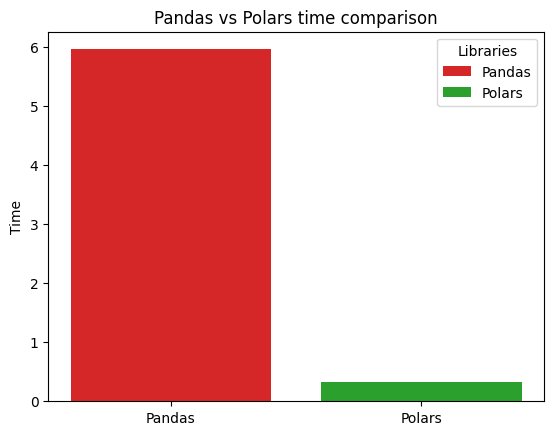

In [41]:
start = time()
interactions_with_tags_pl = interactions_pl.join(tags_pl, on=['user_id', 'item_id'], how='left')
time_pl = time() - start

start = time()
interactions_with_tags_pd = interactions_pd.merge(tags_pd, on=['user_id', 'item_id'], how='left')
time_pd = time() - start

plot_time_bar(time_pl, time_pd)

In [52]:
interactions_with_tags_pl = interactions_with_tags_pl.drop("timestamp_right")
interactions_with_tags_pd = interactions_with_tags_pd.drop("timestamp_y")

KeyError: "['timestamp_y'] not found in axis"

In [54]:
interactions_with_tags_pd

,user_id,item_id,rating,timestamp_x,rating_normalized,datetime,weekday,tag,timestamp_y
0,1,2,3.5,1112486027,0.7,2005-04-02 23:53:47,5,NaN,NaN
1,1,29,3.5,1112484676,0.7,2005-04-02 23:31:16,5,NaN,NaN
2,1,32,3.5,1112484819,0.7,2005-04-02 23:33:39,5,NaN,NaN
3,1,47,3.5,1112484727,0.7,2005-04-02 23:32:07,5,NaN,NaN
4,1,50,3.5,1112484580,0.7,2005-04-02 23:29:40,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...
20265620,138493,68954,4.5,1258126920,0.9,2009-11-13 15:42:00,4,NaN,NaN
20265621,138493,69526,4.5,1259865108,0.9,2009-12-03 18:31:48,3,NaN,NaN
20265622,138493,69644,3.0,1260209457,0.6,2009-12-07 18:10:57,0,NaN,NaN
20265623,138493,70286,5.0,1258126944,1.0,2009-11-13 15:42:24,4,NaN,NaN


In [48]:
interactions_with_tags_pd

,user_id,item_id,rating,timestamp_x,rating_normalized,datetime,weekday,tag,timestamp_y
0,1,2,3.5,1112486027,0.7,2005-04-02 23:53:47,5,NaN,NaN
1,1,29,3.5,1112484676,0.7,2005-04-02 23:31:16,5,NaN,NaN
2,1,32,3.5,1112484819,0.7,2005-04-02 23:33:39,5,NaN,NaN
3,1,47,3.5,1112484727,0.7,2005-04-02 23:32:07,5,NaN,NaN
4,1,50,3.5,1112484580,0.7,2005-04-02 23:29:40,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...
20265620,138493,68954,4.5,1258126920,0.9,2009-11-13 15:42:00,4,NaN,NaN
20265621,138493,69526,4.5,1259865108,0.9,2009-12-03 18:31:48,3,NaN,NaN
20265622,138493,69644,3.0,1260209457,0.6,2009-12-07 18:10:57,0,NaN,NaN
20265623,138493,70286,5.0,1258126944,1.0,2009-11-13 15:42:24,4,NaN,NaN


Pandas: 1.0063905715942383; Polars: 0.6006157398223877


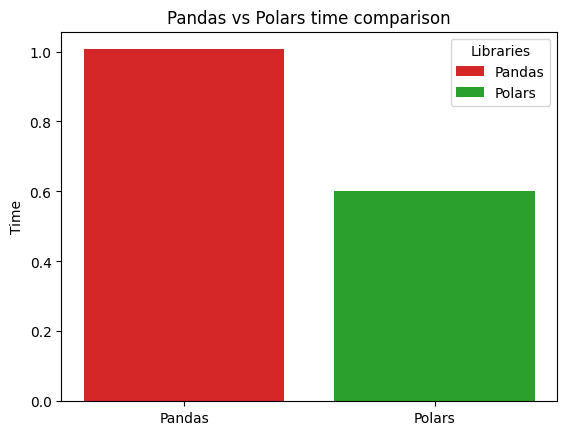

In [55]:
start = time()
interactions_with_tags_pl = interactions_with_tags_pl.with_columns(pl.col('tag').fill_null('unknown'))
time_pl = time() - start

start = time()
interactions_with_tags_pd['tag'] = interactions_with_tags_pd['tag'].fillna('unknown')
time_pd = time() - start

plot_time_bar(time_pl, time_pd)

In [57]:
interactions_with_tags_pd

,user_id,item_id,rating,timestamp_x,rating_normalized,datetime,weekday,tag,timestamp_y
0,1,2,3.5,1112486027,0.7,2005-04-02 23:53:47,5,unknown,NaN
1,1,29,3.5,1112484676,0.7,2005-04-02 23:31:16,5,unknown,NaN
2,1,32,3.5,1112484819,0.7,2005-04-02 23:33:39,5,unknown,NaN
3,1,47,3.5,1112484727,0.7,2005-04-02 23:32:07,5,unknown,NaN
4,1,50,3.5,1112484580,0.7,2005-04-02 23:29:40,5,unknown,NaN
...,...,...,...,...,...,...,...,...,...
20265620,138493,68954,4.5,1258126920,0.9,2009-11-13 15:42:00,4,unknown,NaN
20265621,138493,69526,4.5,1259865108,0.9,2009-12-03 18:31:48,3,unknown,NaN
20265622,138493,69644,3.0,1260209457,0.6,2009-12-07 18:10:57,0,unknown,NaN
20265623,138493,70286,5.0,1258126944,1.0,2009-11-13 15:42:24,4,unknown,NaN


#### Оконные функции

In [58]:
interactions_pl

user_id,item_id,rating,timestamp,rating_normalized,datetime,weekday
i32,i32,f32,i64,f64,datetime[μs],u32
1,2,3.5,1112486027,0.7,2005-04-02 23:53:47,6
1,29,3.5,1112484676,0.7,2005-04-02 23:31:16,6
1,32,3.5,1112484819,0.7,2005-04-02 23:33:39,6
1,47,3.5,1112484727,0.7,2005-04-02 23:32:07,6
1,50,3.5,1112484580,0.7,2005-04-02 23:29:40,6
1,112,3.5,1094785740,0.7,2004-09-10 03:09:00,5
1,151,4.0,1094785734,0.8,2004-09-10 03:08:54,5
1,223,4.0,1112485573,0.8,2005-04-02 23:46:13,6
1,253,4.0,1112484940,0.8,2005-04-02 23:35:40,6


In [59]:
# нормальзованный по пользователям рейтинг
interactions_pl.with_columns(
    (pl.col('rating') / pl.col('rating').mean().over('user_id')).alias('normalized_rating_by_user')
)

user_id,item_id,rating,timestamp,rating_normalized,datetime,weekday,normalized_rating_by_user
i32,i32,f32,i64,f64,datetime[μs],u32,f32
1,2,3.5,1112486027,0.7,2005-04-02 23:53:47,6,0.935115
1,29,3.5,1112484676,0.7,2005-04-02 23:31:16,6,0.935115
1,32,3.5,1112484819,0.7,2005-04-02 23:33:39,6,0.935115
1,47,3.5,1112484727,0.7,2005-04-02 23:32:07,6,0.935115
1,50,3.5,1112484580,0.7,2005-04-02 23:29:40,6,0.935115
1,112,3.5,1094785740,0.7,2004-09-10 03:09:00,5,0.935115
1,151,4.0,1094785734,0.8,2004-09-10 03:08:54,5,1.068702
1,223,4.0,1112485573,0.8,2005-04-02 23:46:13,6,1.068702
1,253,4.0,1112484940,0.8,2005-04-02 23:35:40,6,1.068702


In [61]:
interactions_pl

user_id,item_id,rating,timestamp,rating_normalized,datetime,weekday
i32,i32,f32,i64,f64,datetime[μs],u32
1,2,3.5,1112486027,0.7,2005-04-02 23:53:47,6
1,29,3.5,1112484676,0.7,2005-04-02 23:31:16,6
1,32,3.5,1112484819,0.7,2005-04-02 23:33:39,6
1,47,3.5,1112484727,0.7,2005-04-02 23:32:07,6
1,50,3.5,1112484580,0.7,2005-04-02 23:29:40,6
1,112,3.5,1094785740,0.7,2004-09-10 03:09:00,5
1,151,4.0,1094785734,0.8,2004-09-10 03:08:54,5
1,223,4.0,1112485573,0.8,2005-04-02 23:46:13,6
1,253,4.0,1112484940,0.8,2005-04-02 23:35:40,6


### Реальные примеры

#### Обогащение информации о фильмах

In [62]:
# средний рейтинг айтема
item_avg_rating = interactions_pl.group_by('item_id').agg(pl.col('rating').mean().alias('avg_rating'))
item_features_pl = item_features_pl.join(
    item_avg_rating,
    on='item_id'
)

# количество уникальных юзеров, проивзаимодействовавших с айтемом
item_popularity = interactions_pl.group_by('item_id').agg(pl.col('user_id').unique().count().alias('popularity'))
item_features_pl = item_features_pl.join(
    item_popularity,
    on='item_id'
)

In [63]:
item_features_pl

item_id,title,genres,avg_rating,popularity
i32,str,list[str],f32,u32
112064,"""Plot Against H…","[""comedy""]",2.5,1
92224,"""River Called T…","[""drama""]",3.25,2
52672,"""Confetti (2006…","[""comedy""]",2.916667,6
68480,"""Flatfoot on th…","[""action"", ""comedy"", ""crime""]",2.916667,6
123200,"""Jim Jefferies:…","[""comedy""]",3.5,1
27584,"""Dead End (2003…","[""comedy"", ""horror"", … ""thriller""]",3.243976,166
112448,"""Happy Birthday…","[""documentary""]",3.0,1
1280,"""Raise the Red …","[""drama""]",4.144328,3253
2880,"""Armour of God …","[""action"", ""adventure"", ""comedy""]",3.216129,465


#### Обогащение информации о пользователях

In [64]:
# создаем user_features из interactions
user_features = interactions_pl.select('user_id').unique()

In [65]:
user_features

user_id
i32
34688
115136
87040
132288
74048
136256
63424
79104
21440


In [66]:
## средний рейтинг пользователя
avg_rating = interactions_pl.group_by('user_id').agg(pl.col('rating').mean().alias('avg_rating'))
user_features = user_features.join(
    avg_rating,
    on='user_id',
    how='inner'
)

#количество просмотренных фильмов
count_seen_items = interactions_pl.group_by('user_id').agg(pl.col('item_id').count().alias('count_seen_items'))
user_features = user_features.join(
    count_seen_items,
    on='user_id',
    how='inner'
)

#количество интеракций за последний год
users_by_last_year = interactions_pl.filter(pl.col('datetime').dt.year() == pl.col('datetime').dt.year().max())

user_features = user_features.join(
    users_by_last_year.group_by('user_id').agg(pl.col('item_id').count().alias('seen_last_year')),
    on = 'user_id',
    how = 'left'
)

user_features = user_features.with_columns(pl.col('seen_last_year').fill_null(0))

In [67]:
user_features

user_id,avg_rating,count_seen_items,seen_last_year
i32,f32,u32,u32
135296,3.543689,103,0
70208,3.636364,22,0
43200,3.783784,37,0
576,3.791209,91,0
78080,3.972789,147,0
59136,4.068965,58,0
112256,3.890625,64,0
10304,3.964286,28,0
10624,3.490215,511,0


##### Топ любителей детских фильмов

In [68]:
children_films = item_features_pl.filter(pl.col('genres').list.contains('children'))
interactions_pl_with_child = interactions_pl.join(children_films, on='item_id', how='inner')
interactions_pl_with_child.group_by('user_id').count().top_k(50, by='count')

user_id,count
i32,u32
131894,570
74142,477
8405,436
118205,419
54465,406
46470,361
71975,336
116317,329
83090,327


In [72]:
children_films

item_id,title,genres,avg_rating,popularity
i32,str,list[str],f32,u32
2048,"""Great Mouse De…","[""action"", ""animation"", … ""crime""]",3.441779,1563
6464,"""Good Burger (1…","[""children"", ""comedy""]",2.269663,445
121792,"""Snow Queen (20…","[""adventure"", ""children"", ""fantasy""]",2.5,2
5504,"""Spy Kids 2: Th…","[""adventure"", ""children""]",2.504318,1158
106240,"""Free Birds (20…","[""action"", ""adventure"", … ""sci-fi""]",2.5,35
1024,"""Three Caballer…","[""animation"", ""children"", ""musical""]",3.183871,1085
34624,"""Summer Magic (…","[""children"", ""comedy"", ""musical""]",3.410714,28
66304,"""Hotel for Dogs…","[""adventure"", ""children"", ""comedy""]",2.797297,111
96960,"""Tobor the Grea…","[""children"", ""sci-fi""]",1.5,1


#### Количество детских фильмов

In [71]:
item_features_pl.filter(pl.col('genres').list.contains('children')).select(pl.count())

count
u32
1118


#### Топ 10 детских фильмов по просмотрам

In [76]:
films_for_child = item_features_pl.filter(pl.col('genres').list.contains('children'))

item_features_pl.join(
    interactions_pl.join(films_for_child, on='item_id', how='inner').group_by('item_id').agg(pl.count()).top_k(10, by='count'),
    on = 'item_id',
    how = 'inner'
).sort('count', descending=True).select([pl.col('title'), pl.col('genres'), pl.col('count')])

title,genres,count
str,list[str],u32
"""Toy Story (199…","[""adventure"", ""animation"", … ""fantasy""]",49695
"""Aladdin (1992)…","[""adventure"", ""animation"", … ""musical""]",41842
"""Lion King, The…","[""adventure"", ""animation"", … ""imax""]",38991
"""Beauty and the…","[""animation"", ""children"", … ""imax""]",35138
"""E.T. the Extra…","[""children"", ""drama"", ""sci-fi""]",32685
"""Babe (1995)""","[""children"", ""drama""]",32255
"""Shrek (2001)""","[""adventure"", ""animation"", … ""romance""]",31972
"""Home Alone (19…","[""children"", ""comedy""]",28348
"""Willy Wonka & …","[""children"", ""comedy"", … ""musical""]",28335


In [74]:
interactions_with_child

(shape: (10, 2)
 ┌─────────┬───────┐
 │ item_id ┆ count │
 │ ---     ┆ ---   │
 │ i32     ┆ u32   │
 ╞═════════╪═══════╡
 │ 1       ┆ 49695 │
 │ 588     ┆ 41842 │
 │ 364     ┆ 38991 │
 │ 595     ┆ 35138 │
 │ …       ┆ …     │
 │ 4306    ┆ 31972 │
 │ 586     ┆ 28348 │
 │ 1073    ┆ 28335 │
 │ 4886    ┆ 23657 │
 └─────────┴───────┘,)